# Lab 2 - Build a CNN model for CIFAR10 dataset

# Here is the steps the program follows:
1. Load CIFAR-10 dataset: Load the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 different classes.
2. Normalize pixel values: Normalize pixel values to be between 0 and 1.
3. Define the CNN model: Define a convolutional neural network model using Sequential. The model consists of three convolutional layers with ReLU activation, followed by max pooling layers. Then, it flattens the output and adds two fully connected layers.
4. Compile the model: Compile the model using the Adam optimizer and sparse categorical crossentropy loss function.
5. Train the model: Train the model on the training data for 10 epochs.
6. Evaluate the model: Evaluate the model on the test data and print the test accuracy.
7. Plot accuracy and loss curves: Plot the training and validation accuracy and loss curves to visualize the model's performance during training.

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt


In [12]:

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [13]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
# See the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.3247 - loss: 2.3465 - val_accuracy: 0.5012 - val_loss: 1.3914
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5313 - loss: 1.3252 - val_accuracy: 0.5637 - val_loss: 1.2346
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5914 - loss: 1.1640 - val_accuracy: 0.6076 - val_loss: 1.1241
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6353 - loss: 1.0435 - val_accuracy: 0.5853 - val_loss: 1.1901
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6621 - loss: 0.9672 - val_accuracy: 0.6518 - val_loss: 1.0241
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6891 - loss: 0.8907 - val_accuracy: 0.6474 - val_loss: 1.0496
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7137 - loss: 0.8208 - val_accuracy: 0.6453 - val_loss: 1.0917
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7334 - loss: 0

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.6699 - loss: 1.0397
Test Accuracy: 0.6699000000953674


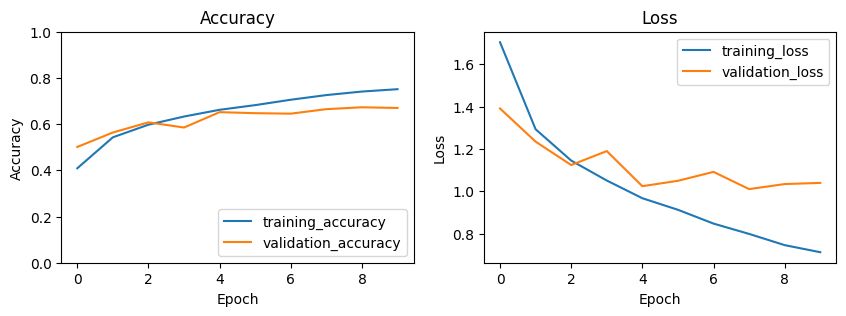

In [17]:
# Plot accuracy and loss curves as subplots
plt.figure(figsize=(10, 3))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()
